In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
prod = pd.read_csv('GET_labourproductivity.csv')

In [3]:
sector_share = pd.read_csv('GET_sector_share.csv')

In [4]:
gdp = pd.read_csv('GDP.csv')

In [5]:
disc = pd.read_csv('disc.csv')

In [6]:
print (gdp.columns)

Index(['Region_country', 'Country_code', 'Indicator Name', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016'],
      dtype='object')


In [7]:
print (disc.columns)

Index(['Region_country', 'Region_type', 'Country_id', 'Country_code', 'Region',
       'Region_id'],
      dtype='object')


In [8]:
print (prod.columns)

Index(['Year', 'Region_country', 'Output_per_worker'], dtype='object')


In [9]:
print (sector_share.columns)

Index(['Year', 'Region_country', 'Agriculture', 'Agriculture_Male',
       'Agriculture_Female', 'Industry', 'Industry_Male', 'Industry_Female',
       'Services', 'Services_Male', 'Services_Female'],
      dtype='object')


In [10]:
print (prod.describe())

              Year  Output_per_worker
count  5264.000000        5264.000000
mean   2004.500000       21106.722264
std       8.078515       28641.677973
min    1991.000000         156.000000
25%    1997.750000        2329.750000
50%    2004.500000        8903.000000
75%    2011.250000       26650.500000
max    2018.000000      204441.000000


In [11]:
print (sector_share.describe())

              Year  Agriculture  Agriculture_Male  Agriculture_Female  \
count  5264.000000  5264.000000       5264.000000         5264.000000   
mean   2004.500000    31.058758         31.174240           31.189210   
std       8.078515    25.410264         24.116307           28.998353   
min    1991.000000     0.000000          0.000000            0.000000   
25%    1997.750000     7.100000          8.500000            4.200000   
50%    2004.500000    25.700000         27.200000           22.500000   
75%    2011.250000    51.800000         50.825000           55.300000   
max    2018.000000    92.200000         93.200000           96.700000   

          Industry  Industry_Male  Industry_Female     Services  \
count  5264.000000    5264.000000      5264.000000  5264.000000   
mean     19.674183      24.217971        12.526444    49.265843   
std       9.712058      11.303748         9.223482    19.365789   
min       1.700000       1.500000         0.300000     5.700000   
25%    

In [12]:
prod.Year = prod.Year.astype(str)
sector_share.Year = sector_share.Year.astype(str)

In [14]:
#merge sector_share with labor productivity
sector_prod_merge=pd.merge(sector_share,prod,on=['Year','Region_country'])

In [15]:
sector_prod_merge.ix[:5]

,Year,Region_country,Agriculture,Agriculture_Male,Agriculture_Female,Industry,Industry_Male,Industry_Female,Services,Services_Male,Services_Female,Output_per_worker
0,1991,World,44.5,41.6,48.9,21.7,25.0,16.6,33.8,33.4,34.4,16138
1,1992,World,44.3,41.5,48.7,21.5,24.8,16.4,34.2,33.7,34.9,16054
2,1993,World,43.5,40.8,47.7,21.4,24.7,16.3,35.0,34.5,35.9,16135
3,1994,World,42.8,40.2,46.8,21.3,24.7,16.2,35.9,35.2,37.0,16350
4,1995,World,41.8,39.4,45.6,21.2,24.6,16.1,36.9,36.0,38.3,16607
5,1996,World,41.1,38.8,44.7,21.3,24.6,16.1,37.6,36.6,39.2,16960


In [16]:
# transfrom GDP dataset with melt method to the sturctrue which could be later merged with other data 
gdp_data=pd.melt(gdp, id_vars=['Country_code'], value_vars=["1991","1992","1993","1994","1995","1996","1997","1998",
                                                            "1999","2000","2001","2002","2003","2004","2005","2006",
                                                            "2007","2008","2009","2010","2011","2012","2013","2014",
                                                            "2015","2016"],
        var_name='Year', value_name='GDP_per_Capita')


In [17]:
# merge dataset share of sector with country code disc
sector_share_disc=pd.merge(sector_share, disc, on='Region_country', how='left', sort=False);

In [18]:
sector_share_disc.ix[:2]

,Year,Region_country,Agriculture,Agriculture_Male,Agriculture_Female,Industry,Industry_Male,Industry_Female,Services,Services_Male,Services_Female,Region_type,Country_id,Country_code,Region,Region_id
0,1991,World,44.5,41.6,48.9,21.7,25.0,16.6,33.8,33.4,34.4,World,0,0,World,10
1,1992,World,44.3,41.5,48.7,21.5,24.8,16.4,34.2,33.7,34.9,World,0,0,World,10
2,1993,World,43.5,40.8,47.7,21.4,24.7,16.3,35.0,34.5,35.9,World,0,0,World,10


In [19]:
gdp_data.Country_code = gdp_data.Country_code.astype(str)


In [20]:
sector_share_disc.Country_code = sector_share_disc.Country_code.astype(str)


In [21]:
sector_share_disc.Year = sector_share_disc.Year.astype(str)


In [22]:
gdp_data.Year = gdp_data.Year.astype(str)

In [23]:
# merge sector_share_disc with gdp_data
data_merge=pd.merge(sector_share_disc,gdp_data,on=['Country_code','Year'],how='left');

In [24]:
data_merge.ix[:5]

,Year,Region_country,Agriculture,Agriculture_Male,Agriculture_Female,Industry,Industry_Male,Industry_Female,Services,Services_Male,Services_Female,Region_type,Country_id,Country_code,Region,Region_id,GDP_per_Capita
0,1991,World,44.5,41.6,48.9,21.7,25.0,16.6,33.8,33.4,34.4,World,0,0,World,10,NaN
1,1992,World,44.3,41.5,48.7,21.5,24.8,16.4,34.2,33.7,34.9,World,0,0,World,10,NaN
2,1993,World,43.5,40.8,47.7,21.4,24.7,16.3,35.0,34.5,35.9,World,0,0,World,10,NaN
3,1994,World,42.8,40.2,46.8,21.3,24.7,16.2,35.9,35.2,37.0,World,0,0,World,10,NaN
4,1995,World,41.8,39.4,45.6,21.2,24.6,16.1,36.9,36.0,38.3,World,0,0,World,10,NaN
5,1996,World,41.1,38.8,44.7,21.3,24.6,16.1,37.6,36.6,39.2,World,0,0,World,10,NaN


In [25]:
data_merge.Year = data_merge.Year.astype(str)

In [26]:
#merge data_merge with labor productivity
data_prod_gdp=pd.merge(data_merge,prod,on=['Year','Region_country'])

In [27]:
data_prod_gdp.ix[:3]

,Year,Region_country,Agriculture,Agriculture_Male,Agriculture_Female,Industry,Industry_Male,Industry_Female,Services,Services_Male,Services_Female,Region_type,Country_id,Country_code,Region,Region_id,GDP_per_Capita,Output_per_worker
0,1991,World,44.5,41.6,48.9,21.7,25.0,16.6,33.8,33.4,34.4,World,0,0,World,10,NaN,16138
1,1992,World,44.3,41.5,48.7,21.5,24.8,16.4,34.2,33.7,34.9,World,0,0,World,10,NaN,16054
2,1993,World,43.5,40.8,47.7,21.4,24.7,16.3,35.0,34.5,35.9,World,0,0,World,10,NaN,16135
3,1994,World,42.8,40.2,46.8,21.3,24.7,16.2,35.9,35.2,37.0,World,0,0,World,10,NaN,16350


In [30]:
data_prod_gdp_2012=data_prod_gdp[(data_prod_gdp['Year']=='2012')&(data_prod_gdp['Region_type']=='country')].drop(['GDP_per_Capita','Output_per_worker','Country_id','Region_id'],axis=1)

In [31]:
data_prod_gdp_2012.plot.box( figsize=(15, 6))

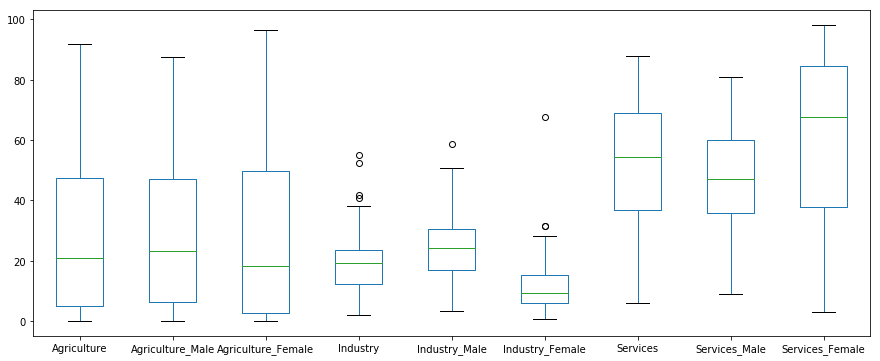

In [33]:
plt.show()

In [32]:
data_prod_gdp_2012.describe()

,Agriculture,Agriculture_Male,Agriculture_Female,Industry,Industry_Male,Industry_Female,Services,Services_Male,Services_Female
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,28.305618,28.565169,28.264045,19.031461,24.143820,11.167416,52.664607,47.287079,60.561236
std,25.077002,23.832166,28.494810,9.293550,11.085665,7.955757,19.693612,16.357679,26.609261
min,0.000000,0.000000,0.000000,2.000000,3.200000,0.600000,6.000000,9.100000,3.000000
25%,4.925000,6.375000,2.750000,12.300000,17.025000,5.825000,36.825000,35.950000,37.675000
50%,20.900000,23.300000,18.250000,19.350000,24.300000,9.400000,54.300000,47.250000,67.600000
75%,47.300000,47.225000,49.800000,23.475000,30.650000,15.300000,69.025000,59.975000,84.550000
max,92.000000,87.400000,96.400000,54.900000,58.600000,67.800000,87.800000,80.800000,98.300000


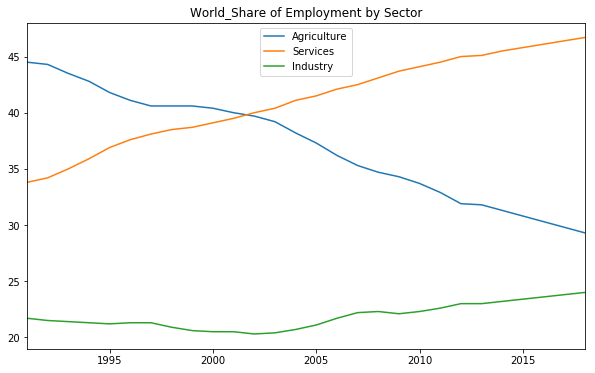

In [309]:
ts=data_prod_gdp[data_prod_gdp['Region_country']=='World'][['Year','Agriculture','Services','Industry']]
years=ts['Year'].astype(int).tolist()
ts=ts.set_index([years])
ts.plot(figsize=(10,6),title='World_Share of Employment by Sector')
plt.show()

In [61]:
data_prod_gdp[(data_prod_gdp['Year']=='2012')].plot.scatter(x='Services',y='GDP_per_Capita', figsize=(6, 6))

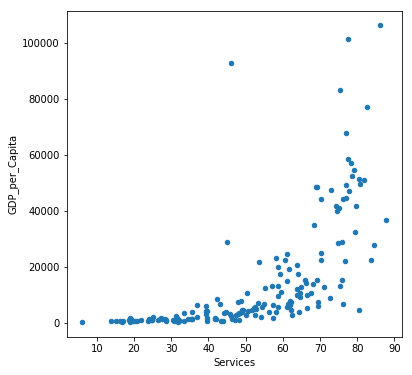

In [62]:
plt.show()

In [59]:
data_prod_gdp[(data_prod_gdp['Year']=='2012')].plot.scatter(x='Industry',y='GDP_per_Capita', figsize=(6, 6))

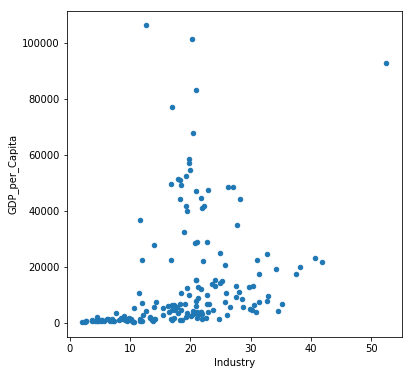

In [60]:
plt.show()

In [57]:
data_prod_gdp[(data_prod_gdp['Year']=='2012')].plot.scatter(x='Services',y='Output_per_worker', figsize=(6, 6))

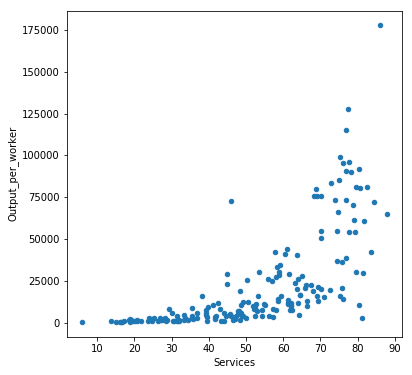

In [58]:
plt.show()

In [38]:
import scipy.stats as stats

In [39]:
stats.stats.pearsonr(data_prod_gdp['Services'], data_prod_gdp['Output_per_worker'])

(0.66965129937611301, 0.0)

In [40]:
stats.stats.pearsonr(data_prod_gdp['Industry'], data_prod_gdp['Output_per_worker'])

(0.32387721143945247, 8.1070597371682162e-129)

In [41]:
stats.stats.pearsonr(data_prod_gdp['Agriculture'], data_prod_gdp['Output_per_worker'])

(-0.63412243128972678, 0.0)

In [42]:
data_prod_gdp_1 = data_prod_gdp.dropna()

In [43]:
stats.stats.pearsonr(data_prod_gdp_1['Services'], data_prod_gdp_1['GDP_per_Capita'])

(0.62659903081981927, 0.0)

In [44]:
data_prod_gdp.to_csv('data_prod_gdp.csv')

In [45]:
stats.stats.pearsonr(data_prod_gdp_1['Output_per_worker'], data_prod_gdp_1['GDP_per_Capita'])

(0.91765649186144582, 0.0)

In [46]:
regions=data_prod_gdp[data_prod_gdp['Region_type']== 'Region']['Region'].drop_duplicates()

In [47]:
regions

28               Developed Economies & European Union
1092    Central & South Eastern Europe (non-EU) & CIS
1624                                        East Asia
1848                    South East Asia & the Pacific
2268                                       South Asia
2520                    Latin America & the Caribbean
3388                                      Middle East
3780                                     North Africa
3976                               Sub-Saharan Africa
Name: Region, dtype: object

In [48]:
type(regions)

pandas.core.series.Series

In [49]:
print ("Pearson Correlation between share of services sector and output per worker for all countries: ")
for i in regions:
    print (i+"\t" + str(stats.stats.pearsonr(
    data_prod_gdp[(data_prod_gdp['Region']== i)&(data_prod_gdp['Region_type']== 'country')]['Services'],
    data_prod_gdp[(data_prod_gdp['Region']== i)&(data_prod_gdp['Region_type']== 'country')]['Output_per_worker']
    )));

Pearson Correlation between share of services sector and output per worker for all countries: 
Developed Economies & European Union	(0.72709804916185017, 4.3744914877881772e-171)
Central & South Eastern Europe (non-EU) & CIS	(0.43833623834977992, 4.4417825729078361e-25)
East Asia	(0.90578688547842268, 2.8574744616006861e-74)
South East Asia & the Pacific	(0.86007561877736194, 4.7740048968503959e-116)
South Asia	(0.8643894261510191, 3.1993514623810591e-68)
Latin America & the Caribbean	(0.73138182586336498, 1.8617936879778915e-141)
Middle East	(0.31692346049709474, 6.175103174362043e-10)
North Africa	(0.8663155580403934, 6.4442735059027228e-52)
Sub-Saharan Africa	(0.64299513812556197, 6.4649519761867419e-148)


In [50]:
print ("Pearson Correlation between share of services sector and GDP per capita for all countries: ")
for i in regions:
    print (i + ": "+ "\t" + str(stats.stats.pearsonr(
    data_prod_gdp_1[(data_prod_gdp_1['Region']== i)&(data_prod_gdp_1['Region_type']== 'country')
                    ]['Services'],
    data_prod_gdp_1[(data_prod_gdp_1['Region']== i)&(data_prod_gdp_1['Region_type']== 'country')
                    ]['GDP_per_Capita']
    )));

Pearson Correlation between share of services sector and GDP per capita for all countries: 
Developed Economies & European Union: 	(0.73173769611649386, 1.692622590165951e-152)
Central & South Eastern Europe (non-EU) & CIS: 	(0.52160824158566887, 2.2515326382782326e-31)
East Asia: 	(0.76694235937711452, 1.8711753973806137e-25)
South East Asia & the Pacific: 	(0.77570925261873436, 2.4194773328622941e-67)
South Asia: 	(0.71700985594583511, 2.7654722228803568e-31)
Latin America & the Caribbean: 	(0.75613506817498533, 6.3747084463079511e-130)
Middle East: 	(0.064862349715926512, 0.26678904304359508)
North Africa: 	(0.76793225352498617, 1.1924089656134695e-29)
Sub-Saharan Africa: 	(0.53312673564969459, 9.2263513316918716e-80)


In [63]:
#Pearson Correlation between share of services sector and GDP per capita for all countries in 2012
for i in regions:
    print (i + ": "+ "\t" + str(stats.stats.pearsonr(
    data_prod_gdp_1[(data_prod_gdp_1['Region']== i)&(data_prod_gdp_1['Region_type']== 'country')
                    &(data_prod_gdp_1['Year']== '2012')]['Services'],
    data_prod_gdp_1[(data_prod_gdp_1['Region']== i)&(data_prod_gdp_1['Region_type']== 'country')
                    &(data_prod_gdp_1['Year']== '2012')]['GDP_per_Capita']
    )));


Developed Economies & European Union: 	(0.70373714107004171, 1.1803745570930352e-06)
Central & South Eastern Europe (non-EU) & CIS: 	(0.44851447040469788, 0.061919114911680811)
East Asia: 	(0.80826285544387577, 0.097834197542424325)
South East Asia & the Pacific: 	(0.84432742143316752, 0.00014564656874747588)
South Asia: 	(0.85700485165922136, 0.0065482469476819535)
Latin America & the Caribbean: 	(0.83238817820154054, 3.9673431919474906e-08)
Middle East: 	(-0.041257608604497044, 0.89869768769750902)
North Africa: 	(0.94729338004984709, 0.014410132572606585)
Sub-Saharan Africa: 	(0.51866558005456143, 0.00043329901393654745)


In [101]:
#create list for all countries which have valid value for GDP_per_Capita
#data_prod_gdp_1 is the df which excludes NA
countries=data_prod_gdp_1[data_prod_gdp_1['Region_type']== 'country']['Region_country'].drop_duplicates()

In [105]:
#create a list to take record of the result of Pearson correlation for all contries.
result_correlation=[];
for i in countries:
    item=[]
    item.append(i)
    item.append(stats.stats.pearsonr(
    data_prod_gdp_1[(data_prod_gdp_1['Region_country']== i)]['Services'],
    data_prod_gdp_1[(data_prod_gdp_1['Region_country']== i)]['GDP_per_Capita']
    ))
    result_correlation.append(item)

In [110]:
#print out countries in which two factors have negative correlatlion or results are not siginificant
n=0;
for i in result_correlation:
    
    if not ((i[1][0]) >0 and (i[1][0]) > 0.05):
        print (i)
        n=n+1
print (n)

['Bosnia and Herzegovina', (-0.82455502701483951, 2.3652440062225532e-06)]
['Georgia', (-0.33622870666734583, 0.10031626879505239)]
['Sri Lanka', (-0.15575920247615105, 0.45719090066447088)]
['Suriname', (-0.80847702790028897, 1.0104914237888825e-06)]
['Trinidad and Tobago', (-0.26982682419138759, 0.19209190893429834)]
['Uruguay', (-0.72640960056804149, 3.9314165646607687e-05)]
['Bahrain', (-0.41015420385632612, 0.041712723336867721)]
['Kuwait', (-0.48095272800967831, 0.02345461162535778)]
['Oman', (-0.92371951990554002, 4.6053145853612599e-11)]
['Qatar', (-0.91745057527089136, 1.106882489970466e-10)]
['Tunisia', (0.018029982881422976, 0.93183110876138719)]
['Botswana', (-0.94026160188679897, 3.0072314732033321e-12)]
['Central African Republic', (-0.0023818846654299298, 0.99098435140023156)]
['Comoros', (-0.62235074943684698, 0.00089372650941170473)]
['Eritrea', (-0.33610454115449007, 0.14737460934461258)]
['Gambia', (-0.77452151870879138, 5.5146209865297719e-06)]
['Ghana', (-0.6165498

In [64]:
print ("Result of checking normality")
for i in regions:
    print (i+": "+"\r")
    print("    Female: "+str(stats.shapiro(data_prod_gdp[(data_prod_gdp['Region']== i)
                                      &(data_prod_gdp['Region_type']== 'country')]['Services_Female'])));
    print("    Male:   "+str(stats.shapiro(data_prod_gdp[(data_prod_gdp['Region']== i)
                                      &(data_prod_gdp['Region_type']== 'country')]['Services_Male'])));

Result of checking normality
Developed Economies & European Union: 
    Female: (0.8885424137115479, 1.121395050906823e-26)
    Male:   (0.9830441474914551, 1.2873282440040157e-09)
Central & South Eastern Europe (non-EU) & CIS: 
    Female: (0.9731046557426453, 5.375017764208678e-08)
    Male:   (0.9682123064994812, 5.4706337238030756e-09)
East Asia: 
    Female: (0.9552223682403564, 7.634224857611116e-06)
    Male:   (0.9229676127433777, 1.2609161714749462e-08)
South East Asia & the Pacific: 
    Female: (0.9447475075721741, 6.471179148093142e-11)
    Male:   (0.905821681022644, 7.0432661507008505e-15)
South Asia: 
    Female: (0.7845883965492249, 7.379783817375952e-17)
    Male:   (0.9498984813690186, 5.211257416704029e-07)
Latin America & the Caribbean: 
    Female: (0.9575536847114563, 7.236779297830568e-15)
    Male:   (0.9841598272323608, 6.871498214877647e-08)
Middle East: 
    Female: (0.8166248798370361, 4.9222807297820005e-20)
    Male:   (0.9586394429206848, 1.32813049447122

In [65]:
# T-test between male and female groups for all regions
print ("T-test between male and female group: ")
for i in regions:
    print (i+": "+"\r")
    print ("      "+str(stats.ttest_ind(data_prod_gdp[(data_prod_gdp['Region']== i)
                                      &(data_prod_gdp['Region_type']== 'country')]['Services_Female'],
                        data_prod_gdp[(data_prod_gdp['Region']== i)
                                      &(data_prod_gdp['Region_type']== 'country')]['Services_Male'])))

T-test:
Developed Economies & European Union: 
      Ttest_indResult(statistic=48.415466526910102, pvalue=0.0)
Central & South Eastern Europe (non-EU) & CIS: 
      Ttest_indResult(statistic=11.747576853646446, pvalue=5.9449046660220648e-30)
East Asia: 
      Ttest_indResult(statistic=1.5011902351381705, pvalue=0.1341155228009753)
South East Asia & the Pacific: 
      Ttest_indResult(statistic=3.5223935324211939, pvalue=0.00045247317278911597)
South Asia: 
      Ttest_indResult(statistic=-11.457066236006936, pvalue=8.1379211952349306e-27)
Latin America & the Caribbean: 
      Ttest_indResult(statistic=47.254232735482795, pvalue=1.2174553558779953e-310)
Middle East: 
      Ttest_indResult(statistic=7.627704712871437, pvalue=7.5107077507402135e-14)
North Africa: 
      Ttest_indResult(statistic=3.3183798254330963, pvalue=0.0010052592822607051)
Sub-Saharan Africa: 
      Ttest_indResult(statistic=5.0285171170433225, pvalue=5.2905754785498309e-07)


In [67]:
n=0
CountriesByRegion=[]
for i in regions:
    list_n=data_prod_gdp[(data_prod_gdp['Region']== i)
                                      &(data_prod_gdp['Region_type']== 'Region')]['Services'].values.tolist()
    CountriesByRegion.append(list_n)
    #print (len(CountriesByRegion[n]))
    n=n+1

In [68]:
# one-way Anova test for all regions
stats.f_oneway(CountriesByRegion[0],CountriesByRegion[1],CountriesByRegion[2],CountriesByRegion[3],CountriesByRegion[4],
               CountriesByRegion[5],CountriesByRegion[6],CountriesByRegion[7],CountriesByRegion[8])

F_onewayResult(statistic=418.33005470064353, pvalue=2.0832428466506956e-137)

In [69]:
n=0
CountriesByRegion=[]
for i in regions:
    list_n=data_prod_gdp[(data_prod_gdp['Region']== i)
            &(data_prod_gdp['Region_type']== 'country')&(data_prod_gdp['Year']== '2012')]['Services'].values.tolist()
    CountriesByRegion.append(list_n)
    n=n+1
stats.f_oneway(CountriesByRegion[0],CountriesByRegion[1],CountriesByRegion[2],CountriesByRegion[3],CountriesByRegion[4],
               CountriesByRegion[5],CountriesByRegion[6],CountriesByRegion[7],CountriesByRegion[8])

F_onewayResult(statistic=24.427276050266464, pvalue=1.0849137239048907e-24)

In [72]:
# one-way Anova test for all regions from 1991 to 2018
for m in range(1991,2018):
    n=0
    CountriesByRegion=[]
    for i in regions:
        list_n=data_prod_gdp[(data_prod_gdp['Region']== i)
                &(data_prod_gdp['Region_type']== 'country')&(data_prod_gdp['Year']== str(m))]['Services'].values.tolist()
        CountriesByRegion.append(list_n)
#         print (len(CountriesByRegion[n]))
        n=n+1
    print (stats.f_oneway(CountriesByRegion[0],CountriesByRegion[1],CountriesByRegion[2],CountriesByRegion[3],CountriesByRegion[4],
                   CountriesByRegion[5],CountriesByRegion[6],CountriesByRegion[7],CountriesByRegion[8]))

F_onewayResult(statistic=21.481806715821453, pvalue=2.5705632667085296e-22)
F_onewayResult(statistic=21.624470768233198, pvalue=1.9566977276165095e-22)
F_onewayResult(statistic=22.163639715089182, pvalue=7.030155760809674e-23)
F_onewayResult(statistic=22.49473842750967, pvalue=3.7715577289949513e-23)
F_onewayResult(statistic=22.491442205105944, pvalue=3.7949291263526209e-23)
F_onewayResult(statistic=22.0183085918753, pvalue=9.253018430563009e-23)
F_onewayResult(statistic=21.527111249713776, pvalue=2.3569799685282097e-22)
F_onewayResult(statistic=21.875010349795176, pvalue=1.2142294691260597e-22)
F_onewayResult(statistic=22.085335899789769, pvalue=8.1509213825863577e-23)
F_onewayResult(statistic=22.418131167118638, pvalue=4.3543480076763485e-23)
F_onewayResult(statistic=22.420466432111922, pvalue=4.3353021383502485e-23)
F_onewayResult(statistic=22.582493183354849, pvalue=3.2001016346586797e-23)
F_onewayResult(statistic=22.927354590771518, pvalue=1.682813384834551e-23)
F_onewayResult(sta

In [428]:
data_prod_gdp.ix[:3]

,Year,Region_country,Agriculture,Agriculture_Male,Agriculture_Female,Industry,Industry_Male,Industry_Female,Services,Services_Male,Services_Female,Region_type,Country_id,Country_code,Region,Region_id,GDP_per_Capita,Output_per_worker
0,1991,World,44.5,41.6,48.9,21.7,25.0,16.6,33.8,33.4,34.4,World,0,0,World,10,NaN,16138
1,1992,World,44.3,41.5,48.7,21.5,24.8,16.4,34.2,33.7,34.9,World,0,0,World,10,NaN,16054
2,1993,World,43.5,40.8,47.7,21.4,24.7,16.3,35.0,34.5,35.9,World,0,0,World,10,NaN,16135
3,1994,World,42.8,40.2,46.8,21.3,24.7,16.2,35.9,35.2,37.0,World,0,0,World,10,NaN,16350


In [502]:
ShareOfServices1=data_prod_gdp.drop(['GDP_per_Capita','Output_per_worker'],axis=1)

In [503]:
ShareOfServicesA=data_prod_gdp.drop(['Industry','Industry_Male','Industry_Female',
                                     'Services','Services_Male','Services_Female'],axis=1)

In [504]:
print(ShareOfServicesA.columns)

Index(['Year', 'Region_country', 'Agriculture', 'Agriculture_Male',
       'Agriculture_Female', 'Region_type', 'Country_id', 'Country_code',
       'Region', 'Region_id'],
      dtype='object')


In [505]:
ShareOfServicesI=ShareOfServices1.drop(['Agriculture','Agriculture_Male','Agriculture_Female',
                                     'Services','Services_Male','Services_Female'],axis=1);
ShareOfServicesS=ShareOfServices1.drop(['Agriculture','Agriculture_Male','Agriculture_Female',
                                     'Industry','Industry_Male','Industry_Female'],axis=1);

In [506]:
print(ShareOfServicesI.columns)

Index(['Year', 'Region_country', 'Industry', 'Industry_Male',
       'Industry_Female', 'Region_type', 'Country_id', 'Country_code',
       'Region', 'Region_id'],
      dtype='object')


In [507]:
print(ShareOfServicesS.columns)

Index(['Year', 'Region_country', 'Services', 'Services_Male',
       'Services_Female', 'Region_type', 'Country_id', 'Country_code',
       'Region', 'Region_id'],
      dtype='object')


In [508]:
ShareOfServicesS=ShareOfServicesS.rename(columns={'Services': "Total", 'Services_Male': "Male", 'Services_Female': "Female"})

In [509]:
ShareOfServicesS.insert(2, "Category", "Services")
ShareOfServicesS.ix[:3]

,Year,Region_country,Category,Total,Male,Female,Region_type,Country_id,Country_code,Region,Region_id
0,1991,World,Services,33.8,33.4,34.4,World,0,0,World,10
1,1992,World,Services,34.2,33.7,34.9,World,0,0,World,10
2,1993,World,Services,35.0,34.5,35.9,World,0,0,World,10
3,1994,World,Services,35.9,35.2,37.0,World,0,0,World,10


In [510]:
ShareOfServicesI=ShareOfServicesI.rename(columns={'Industry': "Total", 
                                                  'Industry_Male': "Male", 
                                                  'Industry_Female': "Female"});
ShareOfServicesI.insert(2, "Category", "Industry")
ShareOfServicesI.ix[:3]


,Year,Region_country,Category,Total,Male,Female,Region_type,Country_id,Country_code,Region,Region_id
0,1991,World,Industry,21.7,25.0,16.6,World,0,0,World,10
1,1992,World,Industry,21.5,24.8,16.4,World,0,0,World,10
2,1993,World,Industry,21.4,24.7,16.3,World,0,0,World,10
3,1994,World,Industry,21.3,24.7,16.2,World,0,0,World,10


In [511]:
ShareOfServicesA=ShareOfServicesA.rename(columns={'Agriculture': "Total", 
                                                  'Agriculture_Male': "Male", 
                                                  'Agriculture_Female': "Female"});
ShareOfServicesA.insert(2, "Category", "Agriculture")
ShareOfServicesA.ix[:3]

,Year,Region_country,Category,Total,Male,Female,Region_type,Country_id,Country_code,Region,Region_id
0,1991,World,Agriculture,44.5,41.6,48.9,World,0,0,World,10
1,1992,World,Agriculture,44.3,41.5,48.7,World,0,0,World,10
2,1993,World,Agriculture,43.5,40.8,47.7,World,0,0,World,10
3,1994,World,Agriculture,42.8,40.2,46.8,World,0,0,World,10


In [477]:
ShareOfServicesA.ix[:1]

,Year,Region_country,Category,Total,Male,Female,Region_type,Country_id,Country_code,Region,Region_id
0,1991,World,Agriculture,44.5,41.6,48.9,World,0,0,World,10
1,1992,World,Agriculture,44.3,41.5,48.7,World,0,0,World,10


In [478]:
ShareOfServicesI.ix[:1]

,Year,Region_country,Category,Total,Male,Female,Region_type,Country_id,Country_code,Region,Region_id
0,1991,World,Industry,21.7,25.0,16.6,World,0,0,World,10
1,1992,World,Industry,21.5,24.8,16.4,World,0,0,World,10


In [483]:
ShareOfServicesS.ix[:1]

,Year,Region_country,Category,Total,Male,Female,Region_type,Country_id,Country_code,Region,Region_id
0,1991,World,Services,33.8,33.4,34.4,World,0,0,World,10
1,1992,World,Services,34.2,33.7,34.9,World,0,0,World,10


In [484]:
ShareOfServicesS.describe()

,Total,Male,Female,Country_id,Region_id
count,5264.000000,5264.000000,5264.000000,5264.000000,5264.000000
mean,49.265843,44.600627,56.274563,397.909574,4.787234
std,19.365789,16.051599,26.550811,261.518947,3.092399
min,5.700000,5.300000,2.200000,0.000000,1.000000
25%,34.100000,32.600000,33.000000,173.000000,2.000000
50%,50.100000,44.900000,60.600000,399.000000,4.000000
75%,65.000000,56.000000,81.300000,621.000000,8.250000
max,88.200000,84.700000,98.700000,894.000000,10.000000


In [512]:
ShareOfServicesBySector=pd.concat([ShareOfServicesA,ShareOfServicesI,ShareOfServicesS],ignore_index=True)

In [513]:
ShareOfServicesBySector=ShareOfServicesBySector.rename(columns={"Category": "Sector"})

In [515]:
ShareOfServicesBySector.ix[:2]

,Year,Region_country,Sector,Total,Male,Female,Region_type,Country_id,Country_code,Region,Region_id
0,1991,World,Agriculture,44.5,41.6,48.9,World,0,0,World,10
1,1992,World,Agriculture,44.3,41.5,48.7,World,0,0,World,10
2,1993,World,Agriculture,43.5,40.8,47.7,World,0,0,World,10


In [494]:
ShareOfServices1.ix[:2]

,Year,Region_country,Agriculture,Agriculture_Male,Agriculture_Female,Industry,Industry_Male,Industry_Female,Services,Services_Male,Services_Female,Region_type,Country_id,Country_code,Region,Region_id
0,1991,World,44.5,41.6,48.9,21.7,25.0,16.6,33.8,33.4,34.4,World,0,0,World,10
1,1992,World,44.3,41.5,48.7,21.5,24.8,16.4,34.2,33.7,34.9,World,0,0,World,10
2,1993,World,43.5,40.8,47.7,21.4,24.7,16.3,35.0,34.5,35.9,World,0,0,World,10


In [516]:
ShareOfServicesBySector1=ShareOfServicesBySector

In [527]:
ShareOfServicesBySectorByGender=pd.melt(ShareOfServicesBySector, 
            id_vars=['Year','Region_country','Region_type','Country_id','Country_code','Region','Region_id','Sector'], 
            value_vars=['Total','Male','Female'], var_name='Gender', value_name='Share')

In [528]:
ShareOfServicesBySectorByGender.ix[:3]

,Year,Region_country,Region_type,Country_id,Country_code,Region,Region_id,Sector,Gender,Share
0,1991,World,World,0,0,World,10,Agriculture,Total,44.5
1,1992,World,World,0,0,World,10,Agriculture,Total,44.3
2,1993,World,World,0,0,World,10,Agriculture,Total,43.5
3,1994,World,World,0,0,World,10,Agriculture,Total,42.8


In [530]:
ShareOfServicesBySectorByGender.describe()

,Country_id,Region_id,Share
count,47376.000000,47376.000000,47376.000000
mean,397.909574,4.787234,33.331315
std,261.496866,3.092138,24.350479
min,0.000000,1.000000,0.000000
25%,173.000000,2.000000,12.800000
50%,399.000000,4.000000,27.800000
75%,621.000000,8.250000,50.500000
max,894.000000,10.000000,98.700000


In [531]:
data_prod_gdp.ix[:3]

,Year,Region_country,Agriculture,Agriculture_Male,Agriculture_Female,Industry,Industry_Male,Industry_Female,Services,Services_Male,Services_Female,Region_type,Country_id,Country_code,Region,Region_id,GDP_per_Capita,Output_per_worker
0,1991,World,44.5,41.6,48.9,21.7,25.0,16.6,33.8,33.4,34.4,World,0,0,World,10,NaN,16138
1,1992,World,44.3,41.5,48.7,21.5,24.8,16.4,34.2,33.7,34.9,World,0,0,World,10,NaN,16054
2,1993,World,43.5,40.8,47.7,21.4,24.7,16.3,35.0,34.5,35.9,World,0,0,World,10,NaN,16135
3,1994,World,42.8,40.2,46.8,21.3,24.7,16.2,35.9,35.2,37.0,World,0,0,World,10,NaN,16350


In [555]:
ShareOfService_country=ShareOfServicesBySectorByGender[(ShareOfServicesBySectorByGender['Sector']== 'Services')
                                                      &(ShareOfServicesBySectorByGender['Region_type']== 'country')]
ShareOfService_country=ShareOfService_country.drop(['Region_type','Country_code','Sector'],axis=1)
ShareOfService_country=ShareOfService_country.rename(columns={'Region_country':'Country'})

In [556]:
ShareOfService_country.to_csv('ShareOfService_country.csv')

In [559]:
ShareOfService_region=ShareOfServicesBySectorByGender[(ShareOfServicesBySectorByGender['Sector']== 'Services')
                                                      &(ShareOfServicesBySectorByGender['Region_type']== 'Region')]
ShareOfService_region=ShareOfService_region.drop(['Region_country','Region_type','Country_id','Country_code','Sector'],axis=1)

In [561]:
ShareOfService_region.to_csv('ShareOfService_region.csv')

In [572]:
ShareOfServicesBySectorByGender=pd.melt(ShareOfServicesBySector, 
            id_vars=['Year','Region_country','Region_type','Country_id','Country_code','Region','Region_id','Sector'], 
            value_vars=['Total','Male','Female'], var_name='Gender', value_name='Share')

In [573]:
ShareOfServicesBySectorByGender.ix[:1]

,Year,Region_country,Region_type,Country_id,Country_code,Region,Region_id,Sector,Gender,Share
0,1991,World,World,0,0,World,10,Agriculture,Total,44.5
1,1992,World,World,0,0,World,10,Agriculture,Total,44.3


In [605]:
ShareOfALL3Secotr_country=data_prod_gdp[data_prod_gdp['Region_type']=='country']

In [606]:
ShareOfALL3Secotr_country=ShareOfALL3Secotr_country.drop(['Country_code','Region_type'],axis=1)
ShareOfALL3Secotr_country=ShareOfALL3Secotr_country.rename(columns={'Region_country':'Country'})

In [609]:
ShareOfALL3Secotr_country.to_csv('ShareOfAll3Secotr_country.csv')

In [652]:
parcoords1=ShareOfServicesBySector[(ShareOfServicesBySector['Region_type'].isin(['Region','World']))
                                   &(ShareOfServicesBySector['Year'].isin(['2012','2018']))][['Year','Region','Region_id','Sector','Total']]

In [653]:
parcoords1.to_csv('parcoords1.csv')

In [647]:
parcoords2=data_prod_gdp[(data_prod_gdp['Region_type'].isin(['Region','World']))
                                   &(data_prod_gdp['Year']=='2012')][['Year','Region','Region_id','Services_Female']]

In [ ]:
parcoords2

In [648]:
parcoords2

,Year,Region,Region_id,Services_Female
21,2012,World,10,49.2
49,2012,Developed Economies & European Union,1,86.1
1113,2012,Central & South Eastern Europe (non-EU) & CIS,2,62.2
1645,2012,East Asia,6,38.7
1869,2012,South East Asia & the Pacific,4,43.7
2289,2012,South Asia,5,17.0
2541,2012,Latin America & the Caribbean,3,78.7
3409,2012,Middle East,7,62.2
3801,2012,North Africa,8,49.0
3997,2012,Sub-Saharan Africa,9,31.4


In [93]:
parcoords3=data_prod_gdp[(data_prod_gdp['Region_type'].isin(['Region','World']))
                                   &(data_prod_gdp['Year']=='2012')][['Year','Region','Region_id','Services_Male']]